**小波变换去噪**

*适用环境*

- 非平稳
- 非线性
- 高信噪比

*去噪方法*

- 股票价格时间序列的噪音常体现在低频部分（每天都有的无规则的随机波动），主要就是去掉这部分

In [ ]:
# coding:utf-8
import pywt
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import tushare as ts

In [13]:
%matplotlib inline

从tushare下载002237日线数据

In [14]:
df = ts.get_k_data('002237')

提取两列数据进行展示，一列日期d，一列开盘价x

In [15]:
d = df['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
x = df['open']
print(d.dtypes, '\t', len(d))
print(x.dtypes, '\t', len(x))

datetime64[ns] 	 641
float64 	 641


对x进行小波变换dwt，其中选用db2小波基

In [20]:
cA, cD = pywt.dwt(x, 'db2')
print(cA[:5],'\t', len(cA))
print(cD[:5],'\t', len(cD))

[14.60529057 14.48388123 14.5571552  14.607532   14.73707756] 	 322
[ 0.10410331 -0.10858619  0.20249767 -0.09901985  0.06814738] 	 322


画个图进行观察

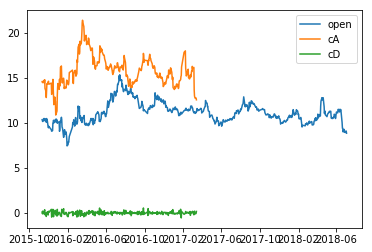

In [22]:
plt.plot(d, x)
plt.plot(d[:322], cA)
plt.plot(d[:322], cD)
plt.legend(['open', 'cA', 'cD'])

如果将低频部分cD视为噪声，则将低频部分cD置零（cD=None）再重构idwt

In [30]:
new_x = pywt.idwt(cA, None, 'db2')
new_x = pd.Series(data=new_x, name='new_open')
print(len(new_x))

642


画出变换前和变换后的对比图

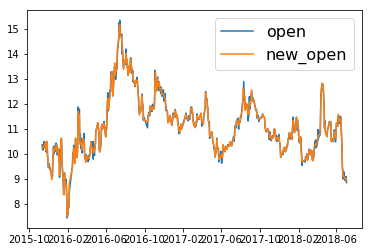

In [44]:
plt.plot(d, x)
plt.plot(d, new_x[:641])
plt.legend(fontsize=16)